In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [90]:
# filename = "data-1675811623-0.02"
filename = "data-1675813703-0.02"
# pd.DataFrame(pd.read_pickle("{}.pkl".format(filename))).to_csv("{}.csv".format(filename), index=False)
df = pd.DataFrame(pd.read_pickle("{}.pkl".format(filename)))

In [91]:
print(df.head())
print(df.columns)

           time                                              state  \
0  1.675814e+09  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  1.675814e+09  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  1.675814e+09  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  1.675814e+09  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  1.675814e+09  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                              action is_shielded command  
0  [0.9, -0.07, 1.6, 0.9, -0.07, 1.6, 0.9, 0.07, ...        None       0  
1  [0.9, -0.07, 1.6, 0.9, -0.07, 1.6, 0.9, 0.07, ...        None       0  
2  [0.9, -0.07, 1.6, 0.9, -0.07, 1.6, 0.9, 0.07, ...        None       0  
3  [0.9, -0.07, 1.6, 0.9, -0.07, 1.6, 0.9, 0.07, ...        None       0  
4  [0.9, -0.07, 1.6, 0.9, -0.07, 1.6, 0.9, 0.07, ...        None       0  
Index(['time', 'state', 'action', 'is_shielded', 'command'], dtype='object')


In [92]:
time_shield_on = []
time_is_shielded = []
time_no_shield = []

freq_shield_on = []
freq_is_shielded = []
freq_no_shield = []

for i in range(1, len(df)):
    if df.iloc[i]["command"] == "8s":
        if df.iloc[i]["is_shielded"] is True:
            time_is_shielded.append(df.iloc[i]["time"])
            freq_is_shielded.append(1.0 / (df.iloc[i]["time"] - df.iloc[i-1]["time"]))
        else:
            time_shield_on.append(df.iloc[i]["time"])
            freq_shield_on.append(1.0 / (df.iloc[i]["time"] - df.iloc[i-1]["time"]))
    else:
        time_no_shield.append(df.iloc[i]["time"])
        freq_no_shield.append(1.0 / (df.iloc[i]["time"] - df.iloc[i-1]["time"]))


/tmp/ipykernel_100766/453747960.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  freq_no_shield.append(1.0 / (df.iloc[i]["time"] - df.iloc[i-1]["time"]))


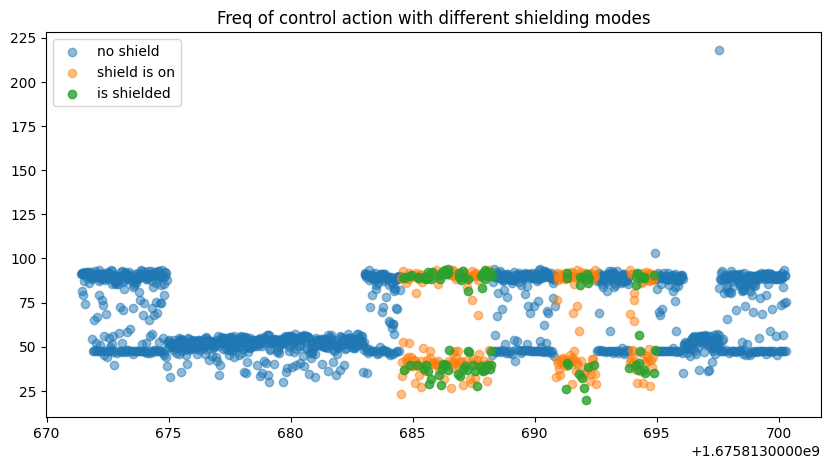

In [93]:
plt.figure(figsize=(10, 5))
plt.title("Freq of control action with different shielding modes")
plt.scatter(time_no_shield, freq_no_shield, label="no shield", alpha=0.5)
plt.scatter(time_shield_on, freq_shield_on, label="shield is on", zorder=5, alpha=0.5)
plt.scatter(time_is_shielded, freq_is_shielded, label="is shielded", zorder=10, alpha=0.8)
plt.legend()
plt.show()

In [94]:
"""
x, y, z,
v_x, v_y, v_z,
roll, pitch, yaw,
ang_vel_x, ang_vel_y, ang_vel_z, 
joint_pos
joint_vel
"""
state_array = np.array(df["state"].to_list())

In [95]:
shielding_status = np.array([1 if x is True else 0 for x in df["is_shielded"]])
shielding_command = np.array([1 if x == "8s" else 0 for x in df["command"]])

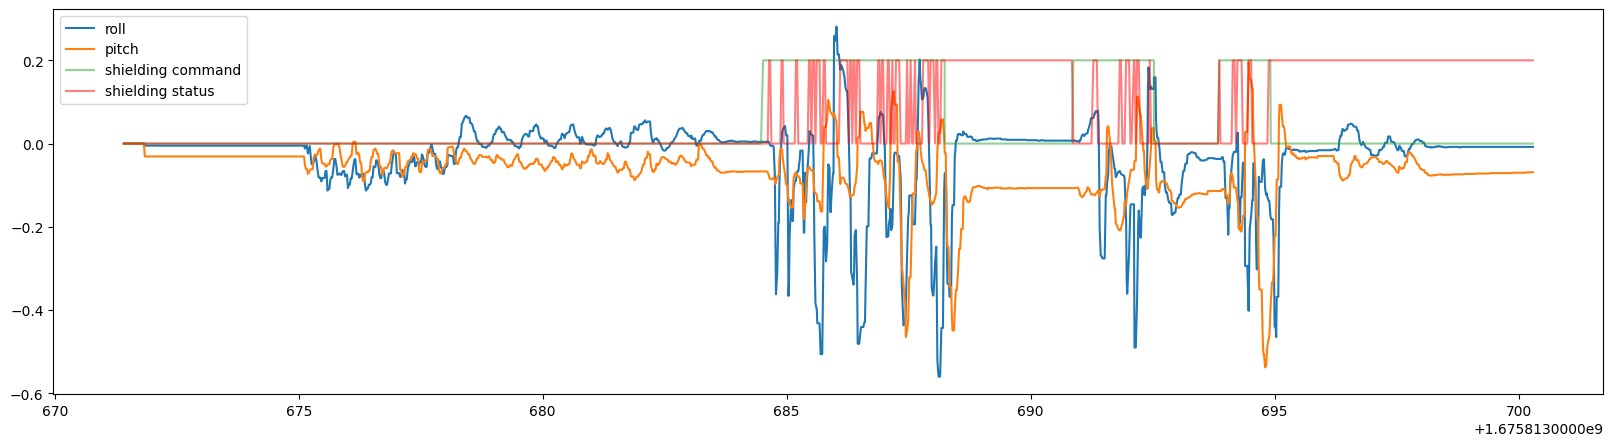

In [98]:
plt.figure(figsize=(20, 5))
plt.plot(df["time"].iloc[:1800], state_array[:1800, 6], label="roll")
plt.plot(df["time"].iloc[:1800], state_array[:1800, 7], label="pitch")
plt.plot(df["time"].iloc[:1800], shielding_command[:1800] * 0.2, label="shielding command", alpha=0.5)
plt.plot(df["time"].iloc[:1800], shielding_status[:1800] * 0.2, label="shielding status", color="red", alpha=0.5)
plt.legend()

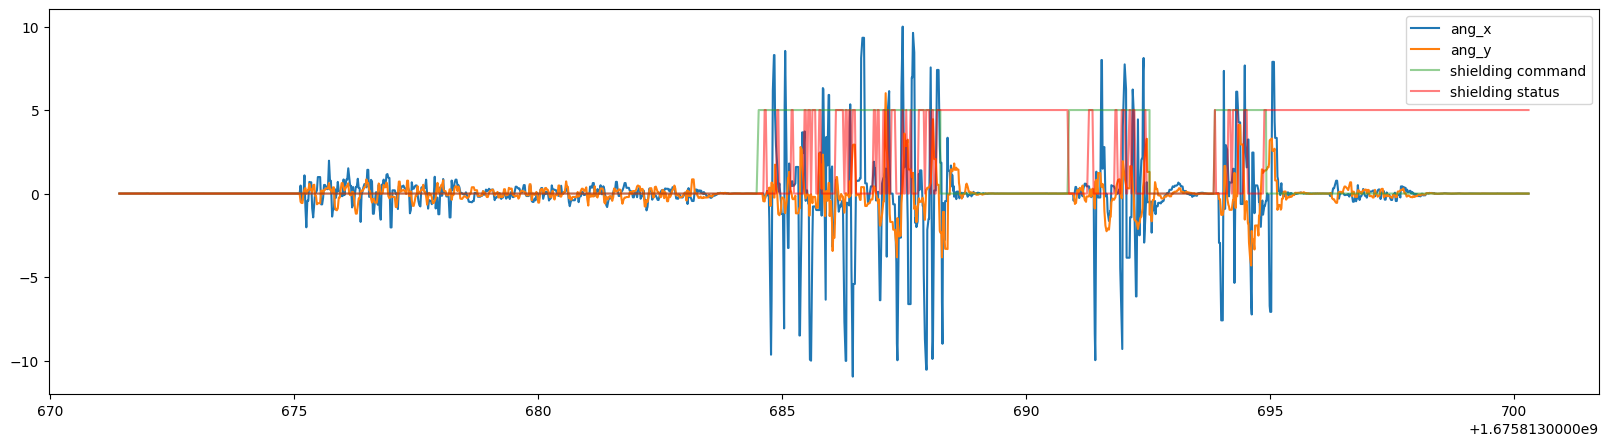

In [99]:
plt.figure(figsize=(20, 5))
plt.plot(df["time"].iloc[:1800], state_array[:1800, 9], label="ang_x")
plt.plot(df["time"].iloc[:1800], state_array[:1800, 10], label="ang_y")
plt.plot(df["time"].iloc[:1800], shielding_command[:1800] * 5, label="shielding command", alpha=0.5)
plt.plot(df["time"].iloc[:1800], shielding_status[:1800] * 5, label="shielding status", color="red", alpha=0.5)
plt.legend()

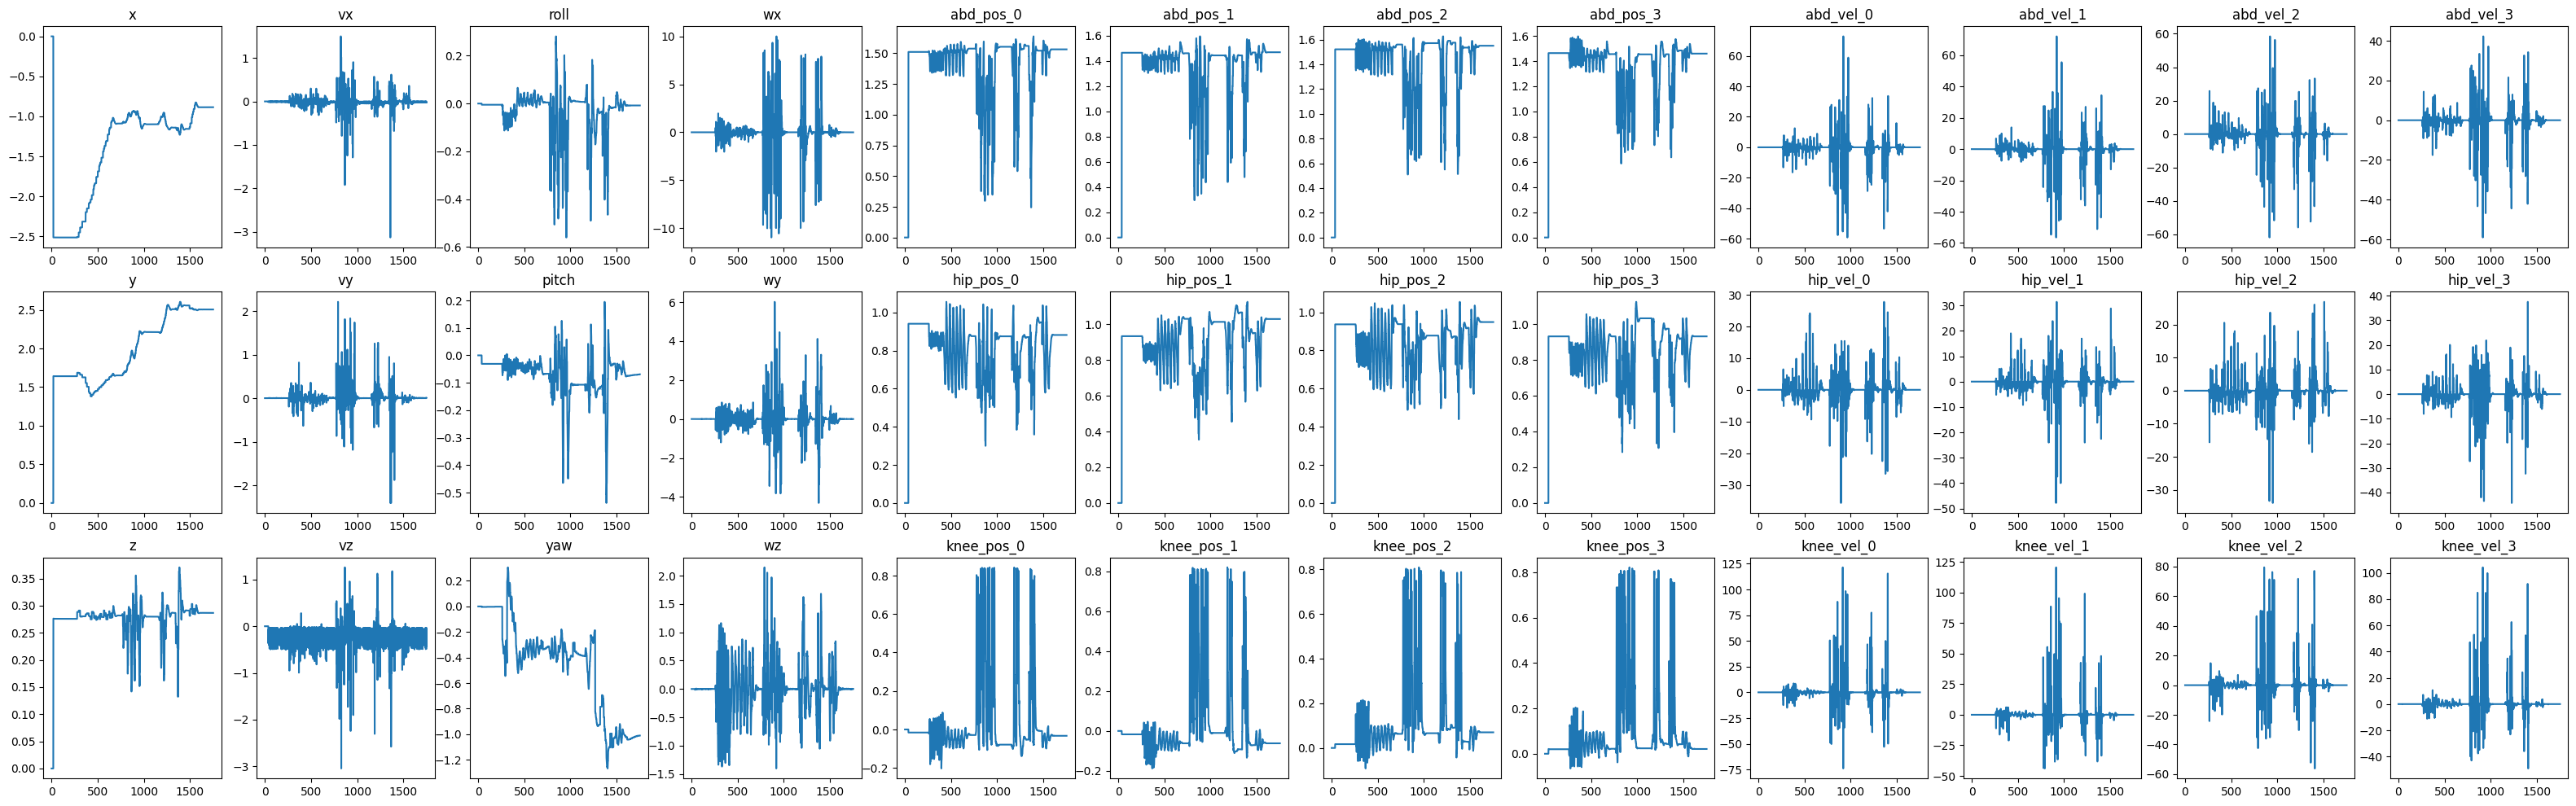

In [112]:
state_var_name = ["x", "y", "z", 
                  "vx", "vy", "vz", 
                  "roll", "pitch", "yaw", 
                  "wx", "wy", "wz",
                  "abd_pos_0", "hip_pos_0", "knee_pos_0",
                  "abd_pos_1", "hip_pos_1", "knee_pos_1", 
                  "abd_pos_2", "hip_pos_2", "knee_pos_2",
                  "abd_pos_3", "hip_pos_3", "knee_pos_3",
                  "abd_vel_0", "hip_vel_0", "knee_vel_0",
                  "abd_vel_1", "hip_vel_1", "knee_vel_1", 
                  "abd_vel_2", "hip_vel_2", "knee_vel_2",
                  "abd_vel_3", "hip_vel_3", "knee_vel_3"
                  ]
fig, ax = plt.subplots(3, 12, figsize=(40, 12))
for j in range(12):
    for i in range(3):
        ax[i][j].plot(state_array[:, j*3+i])
        ax[i][j].set_title(state_var_name[j*3+i])
plt.show()